In [1]:
filename = "words.txt"

with open(filename) as f:
    word_list = f.readlines()
word_list = [word[:5] for word in word_list]

In [2]:
filename2 = "target.txt"

with open(filename2) as f:
    word_target = f.readlines()
word_target = [word[:5] for word in word_target]

In [3]:
import numpy as np

word_array = np.zeros((len(word_list), 5))
target_array = np.zeros((len(word_target), 5))

for i in range(len(word_list)):
    word_array[i] = [ord(character)-96 for character in word_list[i]]
    
for i in range(len(word_target)):
    target_array[i] = [ord(character)-96 for character in word_target[i]]

In [4]:
scoring = [2, 6, 18, 54, 162, 1, 3, 9, 27, 81, 1, 3, 9, 27, 81, 1, 3, 9, 27, 81, 1, 3, 9, 27, 81]
def simi_scores(target_vec, word_array):
    target_vec2 = np.concatenate((target_vec, target_vec[1:], target_vec[:1], target_vec[2:], 
                                  target_vec[:2], target_vec[3:], target_vec[:3], target_vec[4:], target_vec[:4]))
    word_array2 = np.concatenate((word_array, word_array, word_array, word_array, word_array), axis = 1)
    word_array2 = target_vec2 - word_array2
    word_array2 = (word_array2 == 0)
    simi_scores = word_array2@scoring
    return simi_scores

In [5]:
similarity_array = np.zeros((len(word_target), len(word_list)))
for i in range(len(word_target)):
    similarity_array[i] = simi_scores(target_array[i], word_array)
simi_list = [similarity_array[i].tolist() for i in range(len(similarity_array))]

In [6]:
def find_word(word):
    return word_list.index(word)

def find_target(target):
    return word_target.index(target)

def filter(test_word, score, original):
    word = find_word(test_word)
    return [i for i in original if similarity_array[i, word] == score]

def display(list):
    words = []
    for i in list:
        words.append(word_target[i])
    return words

def filter_by_matrix(word, score, original):
    simi_list = [vec for vec in original if vec[word] == score]
    return simi_list

In [8]:
def check_for_split(simi_list):
    if len(simi_list) == 0:
        return 1
    array = np.transpose(np.array(simi_list))
    lengths = [len(np.unique(array[i])) for i in range(len(word_list))]
    return max(lengths)/len(simi_list)

In [9]:
sum = 0
lengths = []
split = []
for j in range(243):
    ori = filter_by_matrix(20, j, simi_list)
    for i in range(243):
        x = filter_by_matrix(i, i, ori)
        if len(x) < 50:
            lengths.append(len(x))
            split.append(check_for_split(x))

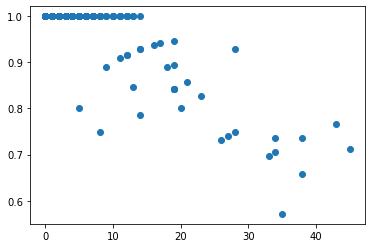

In [10]:
import matplotlib.pyplot as plt

plt.scatter(lengths, split)
plt.show()

In [11]:
def best_next_word_matrix(original):
    best_score = 10000
    best_word = "None!"
    best_chance = 0
    if len(original) == 0:
        return best_word, 0
    for i in range(100): #range(len(word_list)):
        score = 0
        chance = 0
        for j in range(243):
            simi_list = filter_by_matrix(i, j, original)
            length = len(simi_list)
            if length < 2:
                continue
            elif length < 11:
                score += length
            else:
                score += length*1.2 #(2-check_for_split(simi_list))
        if score < best_score:
            best_word = word_list[i]
            best_score = score

    return best_word, 1 + best_score/len(original)

In [12]:
def test_first_word(word):
    results = []
    total_score = 0
    y = find_word(word)
    for i in range(243):
        x = filter_by_matrix(y, i, simi_list)
        word, score = best_next_word_matrix(x)
        total_score += score*len(x)
        results.append((i, word, score))
    return 1 + total_score/len(word_target)

In [13]:
words = ['adieu', 'reais', 'ratio', 'irate', 'stain', 'stare', 'ouija', 'audio', 'react', 'sired', 'tears', 'worse', 'atone', 'arise', 'raise', 'pizza']
for word in words:
    print(f"{word}:{test_first_word(word)}")

adieu:2.7344276457883367
reais:2.6463066954643626
ratio:2.6630669546436287
irate:2.5746868250539956
stain:2.6703239740820734
stare:2.5670842332613395
ouija:2.80682505399568
audio:2.7187041036717066
react:2.621684665226782
sired:2.6437149028077758
tears:2.6202159827213825
worse:2.6500215982721382
atone:2.6037149028077753
arise:2.5903239740820734
raise:2.581511879049676
pizza:2.8657451403887686


In [14]:
def simi_from_colour(list):
    sum = 0
    for i in range(5):
        sum += list[i]*(3**i)
    return sum

In [15]:
simi_from_colour([0,2,0,2,0])

60

In [16]:
x = filter('reais', 1, range(2315))
y = filter('tronc', 60, x)
print(display(y))

['wrung', 'drunk']
